<a href="https://colab.research.google.com/github/Arpit12mish/UNITS/blob/main/AndoidMalware.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Add Dataset path

In [2]:
folder_path = '/content/Android_Permission.csv'  # Correct the folder path, removing the extra 'Android_Permission.csv/' part
plots_path = '/content/Android_Permission.csv'
dataset_path = folder_path + 'Dataset/'
dataset_file = '/content/Android_Permission.csv'  # The actual CSV file location
unsampled = folder_path + 'Columns/unsampled_dtree.png'  # Save unsampled decision tree
oversampled = folder_path + 'Columns/oversampled_dtree.png'  # Save oversampled decision tree
undersampled = folder_path + 'Columns/undersampled_dtree.png'



In [3]:
np.random.seed(0)

# Import Dataset

In [4]:
df = pd.read_csv(dataset_file, sep=',')
df

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,...,Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
0,Canada Post Corporation,com.canadapost.android,Business,Canada Post Mobile App gives you access to som...,3.1,77,0.00,"{com.adaffix.pub.ca.android, com.kevinquan.gas...",7.0,1,...,0,1,0,0,0,0,0,1,0,0
1,Word Farm,com.realcasualgames.words,Brain & Puzzle,Speed and strategy combine in this exciting wo...,4.3,199,0.00,"{air.com.zubawing.FastWordLite, com.joybits.do...",3.0,2,...,0,0,0,0,0,0,0,0,0,0
2,Fortunes of War FREE,fortunesofwar.free,Cards & Casino,"Fortunes of War is a fast-paced, easy to learn...",4.1,243,0.00,"{com.kevinquan.condado, hu.monsta.pazaak, net....",1.0,1,...,0,0,0,0,0,0,0,0,0,0
3,Better Keyboard: Avatar Purple,com.cc.betterkeyboard.skins.avatarpurple,Libraries & Demo,Skin for Better Keyboard featuring a glossy fe...,3.6,2589,0.00,{eu.gdumoulin.betterandroid.skins.transparent....,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,Boxing Day,indiaNIC.android.BoxingDay,Lifestyle,Boxing Day by Christopher Jaymes<p>Based on a ...,0.0,0,5.99,NaN,1.0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,Beechwood Hotel,smartstay.beechwood,Travel & Local,"Beechwood is an Android hotel app for guests, ...",5.0,2,0.00,"{com.bluewaterpages, com.travelconnection.luxu...",3.0,1,...,0,0,0,0,0,0,0,0,0,1
29995,ZDefense: Tower Defense,mobi.zstudio.avi.full,Arcade & Action,Explosive Tower Defense!<p>Top Tower Defense G...,4.6,56,2.99,"{com.entwicklerx.swampdefense, com.digimentgam...",3.0,3,...,0,0,0,0,0,0,0,0,0,1
29996,Super Task Killer FREE,com.netqin.aotkiller,Tools,Get it for FREE. Quickly Kill running apps. Fr...,4.2,6101,0.00,"{com.guardam.TaskKiller, com.netqin.authtoken_...",4.0,3,...,0,0,0,0,0,0,0,0,0,1
29997,Ambassador Hotel Taipei,VMC.Ambassadorhotel,Travel & Local,Key features of this App: <br>1. View photos o...,3.4,5,0.00,"{com.hyxen.app.NewTaipeiTravel, j2ab.android.t...",3.0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
df.shape

(29999, 184)

In [6]:
df.columns

Index(['App', 'Package', 'Category', 'Description', 'Rating',
       'Number of ratings', 'Price', 'Related apps',
       'Dangerous permissions count', 'Safe permissions count',
       ...
       'Your personal information : read calendar events (D)',
       'Your personal information : read contact data (D)',
       'Your personal information : read sensitive log data (D)',
       'Your personal information : read user defined dictionary (D)',
       'Your personal information : retrieve system internal state (S)',
       'Your personal information : set alarm in alarm clock (S)',
       'Your personal information : write Browser's history and bookmarks (D)',
       'Your personal information : write contact data (D)',
       'Your personal information : write to user defined dictionary (S)',
       'Class'],
      dtype='object', length=184)

In [7]:
df.describe()

,Rating,Number of ratings,Price,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),...,Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
count,29999.000000,2.999900e+04,29999.000000,29795.000000,29999.000000,29999.000000,29999.000000,29999.0,29999.000000,29999.000000,...,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000
mean,3.537215,6.852608e+03,0.625707,3.111160,1.353978,0.000300,0.000700,0.0,0.000400,0.000033,...,0.014667,0.087970,0.023801,0.001333,0.000567,0.000400,0.016567,0.039735,0.001500,0.666689
std,1.424685,4.586899e+04,3.222620,3.052602,1.523491,0.017318,0.026449,0.0,0.019997,0.005774,...,0.120219,0.283255,0.152431,0.036492,0.023799,0.019997,0.127645,0.195338,0.038702,0.471405
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,4.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.600000e+01,0.000000,2.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.400000,7.160000e+02,0.000000,4.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.000000,1.908590e+06,158.070000,30.000000,16.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["xtick.labelsize"] = 7
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
#these lines are configuring Matplotlib to produce plots with a specific size, font size for x-axis labels, and a high resolution for both on-screen display and saving to files. This makes the plots more visually appealing and suitable for presentations or publications.

In [9]:
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

In [10]:
def plot_missing_values(null_columns) :
    plt.xlabel("Column Names")
    plt.ylabel("Missing values")
    plt.xticks(rotation = 30, ha = "right")
    name = 'Columns Name vs Missing Values'
    plt.tight_layout()
    plt.title(name)
    ax = sns.barplot(x = list(null_columns.keys()), y = list(null_columns.values()))
    ax.bar_label(ax.containers[0])
    plt.savefig( plots_path + name + ".png", bbox_inches = 'tight')
    plt.show()

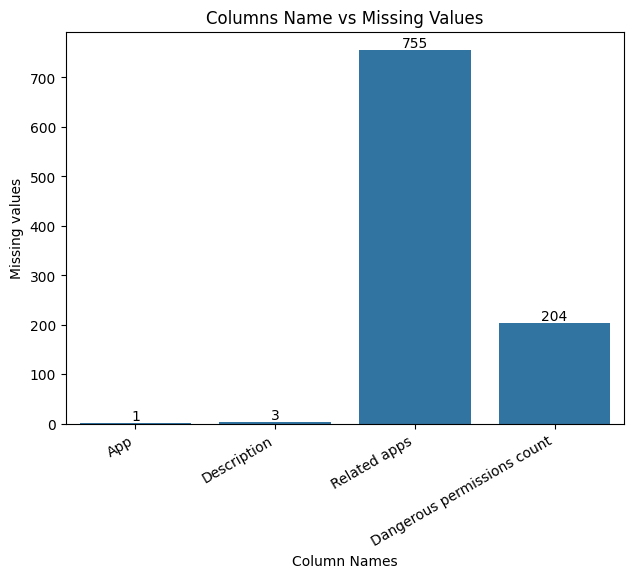

In [11]:
null_sum = dict(df.isna().sum()[df.isna().sum()>0]) #It selects only those columns where the sum of missing values is greater than 0 (meaning there is at least one missing value in the column).
plot_missing_values(null_sum)

In [12]:
def replace_mean(x):
    if x.dtype!='object':
        return x.fillna(x.mean())
    return x

In [13]:
new_df = df.apply(lambda x: replace_mean(x),axis=1)
new_df

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,...,Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
0,Canada Post Corporation,com.canadapost.android,Business,Canada Post Mobile App gives you access to som...,3.1,77,0.00,"{com.adaffix.pub.ca.android, com.kevinquan.gas...",7.0,1,...,0,1,0,0,0,0,0,1,0,0
1,Word Farm,com.realcasualgames.words,Brain & Puzzle,Speed and strategy combine in this exciting wo...,4.3,199,0.00,"{air.com.zubawing.FastWordLite, com.joybits.do...",3.0,2,...,0,0,0,0,0,0,0,0,0,0
2,Fortunes of War FREE,fortunesofwar.free,Cards & Casino,"Fortunes of War is a fast-paced, easy to learn...",4.1,243,0.00,"{com.kevinquan.condado, hu.monsta.pazaak, net....",1.0,1,...,0,0,0,0,0,0,0,0,0,0
3,Better Keyboard: Avatar Purple,com.cc.betterkeyboard.skins.avatarpurple,Libraries & Demo,Skin for Better Keyboard featuring a glossy fe...,3.6,2589,0.00,{eu.gdumoulin.betterandroid.skins.transparent....,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,Boxing Day,indiaNIC.android.BoxingDay,Lifestyle,Boxing Day by Christopher Jaymes<p>Based on a ...,0.0,0,5.99,NaN,1.0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,Beechwood Hotel,smartstay.beechwood,Travel & Local,"Beechwood is an Android hotel app for guests, ...",5.0,2,0.00,"{com.bluewaterpages, com.travelconnection.luxu...",3.0,1,...,0,0,0,0,0,0,0,0,0,1
29995,ZDefense: Tower Defense,mobi.zstudio.avi.full,Arcade & Action,Explosive Tower Defense!<p>Top Tower Defense G...,4.6,56,2.99,"{com.entwicklerx.swampdefense, com.digimentgam...",3.0,3,...,0,0,0,0,0,0,0,0,0,1
29996,Super Task Killer FREE,com.netqin.aotkiller,Tools,Get it for FREE. Quickly Kill running apps. Fr...,4.2,6101,0.00,"{com.guardam.TaskKiller, com.netqin.authtoken_...",4.0,3,...,0,0,0,0,0,0,0,0,0,1
29997,Ambassador Hotel Taipei,VMC.Ambassadorhotel,Travel & Local,Key features of this App: <br>1. View photos o...,3.4,5,0.00,"{com.hyxen.app.NewTaipeiTravel, j2ab.android.t...",3.0,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
df_permission = pd.concat([new_df['App'],new_df.iloc[:,10:]],axis=1)
df_permission

,App,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),...,Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
0,Canada Post Corporation,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,Word Farm,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fortunes of War FREE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Better Keyboard: Avatar Purple,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Boxing Day,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,Beechwood Hotel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29995,ZDefense: Tower Defense,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29996,Super Task Killer FREE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29997,Ambassador Hotel Taipei,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
missing_values_column = df_permission.columns[df_permission.isna().any()]
for c in missing_values_column :
    if df_permission[c].dtype in ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] :
        df_permission[c].replace(np.nan, np.nanmean(df_permission[c].unique()), inplace=True)


In [16]:
#on running this came /content/Android_Permission.csvColumns Name vs Missing Values.png
def plot_class_distribution(vals, sample_type) :
    _ , data = np.unique(vals, return_counts = True)
    labels = ['Benign','Malware']
    colors = sns.color_palette('bright')[0:5]
    plt.tight_layout()
    plt.pie(data, labels = labels, colors = colors, autopct = lambda p: '{:.2f}%\n({:.0f})'.format(p, (p/100) * data.sum()))
    name = 'Class Distribution'
    plt.title(name + ' - ' + sample_type, color = 'red')
    # plt.savefig(plots_path + sample_type + '/' + name + '.png', bbox_inches='tight')
    plt.show()

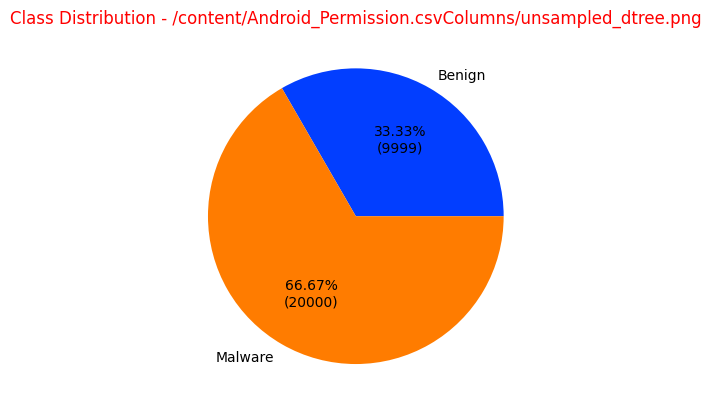

In [17]:
plot_class_distribution(df_permission['Class'], unsampled)

In [18]:
df_permission

,App,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),...,Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
0,Canada Post Corporation,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,Word Farm,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fortunes of War FREE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Better Keyboard: Avatar Purple,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Boxing Day,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,Beechwood Hotel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29995,ZDefense: Tower Defense,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29996,Super Task Killer FREE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29997,Ambassador Hotel Taipei,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
df_permission.index = df_permission['App']
df_permission.drop('App', inplace = True, axis = 1)
df_permission

,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),...,Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
App,,,,,,,,,,,,,,,,,,,,,
Canada Post Corporation,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
Word Farm,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fortunes of War FREE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Better Keyboard: Avatar Purple,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Boxing Day,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Beechwood Hotel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ZDefense: Tower Defense,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Super Task Killer FREE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
x = df_permission.iloc[1: , : -1]
y = df_permission.iloc[1: , -1]
np.random.seed(0)

In [21]:
x

,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),...,Your personal information : read Browser's history and bookmarks (D),Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S)
App,,,,,,,,,,,,,,,,,,,,,
Word Farm,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fortunes of War FREE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Better Keyboard: Avatar Purple,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Boxing Day,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ms Claus Live Wallpaper,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Beechwood Hotel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZDefense: Tower Defense,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Super Task Killer FREE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## EDA
* Exploratory data analysis uses statistical summaries and graphical representations to evaluate the data and find trends, patterns, or verify assumptions in the data.
* EDA helps with a better understanding of the variables in the data collection and their relationships, and is usually used to investigate what data might disclose beyond the formal modeling or hypothesis testing assignment.
* It can also assist in determining the suitability of the statistical methods you are contemplating using for data analysis.


In [22]:
# Check for missing values
print(df.isnull().sum())

App                                                                      1
Package                                                                  0
Category                                                                 0
Description                                                              3
Rating                                                                   0
                                                                        ..
Your personal information : set alarm in alarm clock (S)                 0
Your personal information : write Browser's history and bookmarks (D)    0
Your personal information : write contact data (D)                       0
Your personal information : write to user defined dictionary (S)         0
Class                                                                    0
Length: 184, dtype: int64


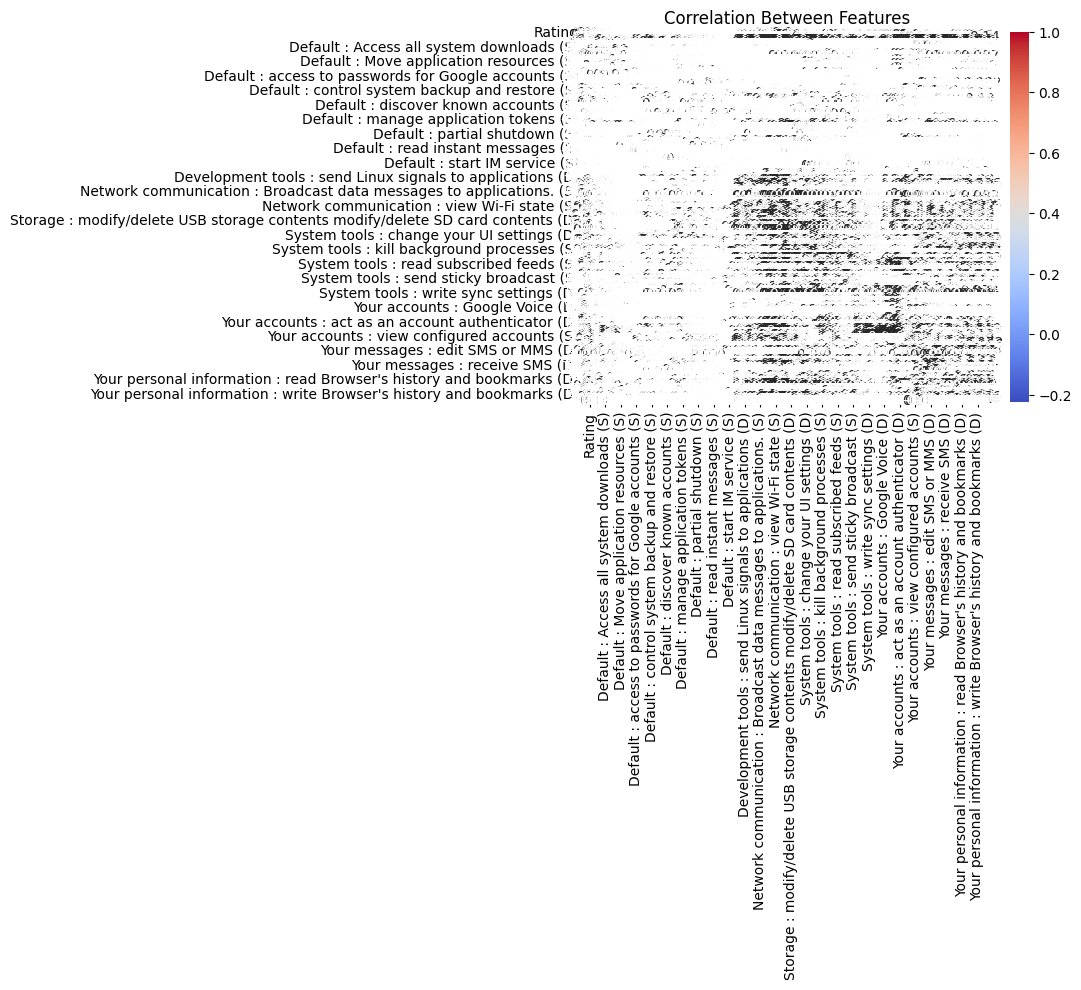

In [23]:
# Check the correlation between the features
# sns.heatmap(df.corr(), cmap='coolwarm')
# plt.title("Correlation Between Features")
# plt.show()
#---------------------------------------------------------
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Check the correlation between the numeric features
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=True)
plt.title("Correlation Between Features")
plt.show()


In [24]:
data = df

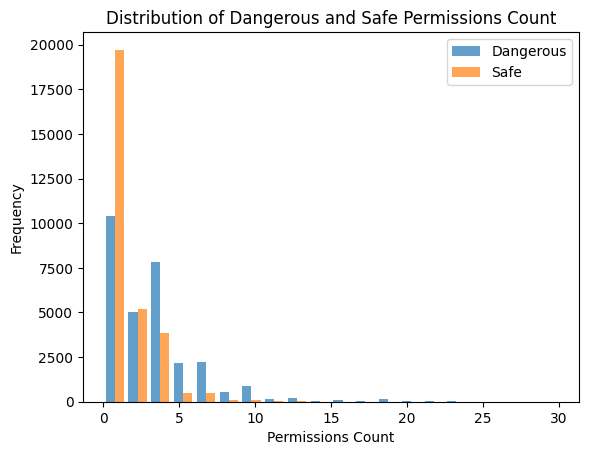

In [25]:
# Analyze the distribution of dangerous and safe permissions count:

import matplotlib.pyplot as plt

dangerous_permissions = data['Dangerous permissions count']
safe_permissions = data['Safe permissions count']

plt.hist([dangerous_permissions, safe_permissions], label=['Dangerous', 'Safe'], bins=20, alpha=0.7)
plt.title('Distribution of Dangerous and Safe Permissions Count')
plt.xlabel('Permissions Count')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()


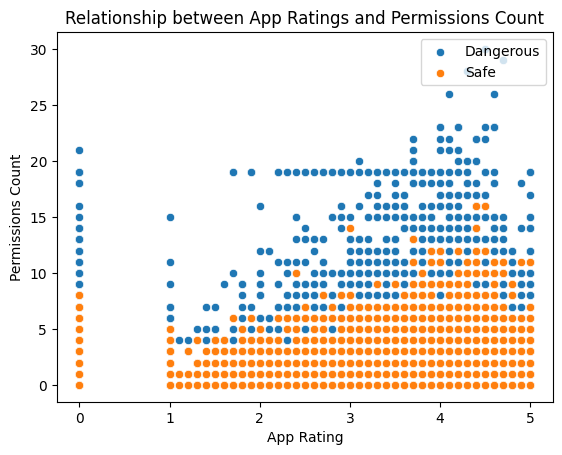

In [26]:
# Analyze the relationship between app ratings and permissions count:

import seaborn as sns

sns.scatterplot(x=data['Rating'], y=data['Dangerous permissions count'], label='Dangerous')
sns.scatterplot(x=data['Rating'], y=data['Safe permissions count'], label='Safe')
plt.title('Relationship between App Ratings and Permissions Count')
plt.xlabel('App Rating')
plt.ylabel('Permissions Count')
plt.legend(loc='upper right')
plt.show()


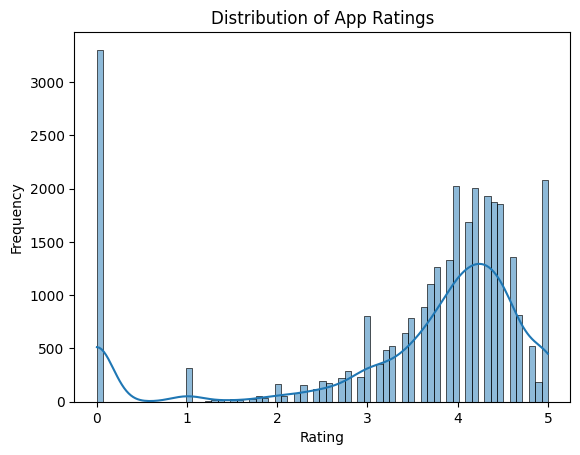

In [27]:
# Analyze the distribution of app ratings:

sns.histplot(data['Rating'], kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


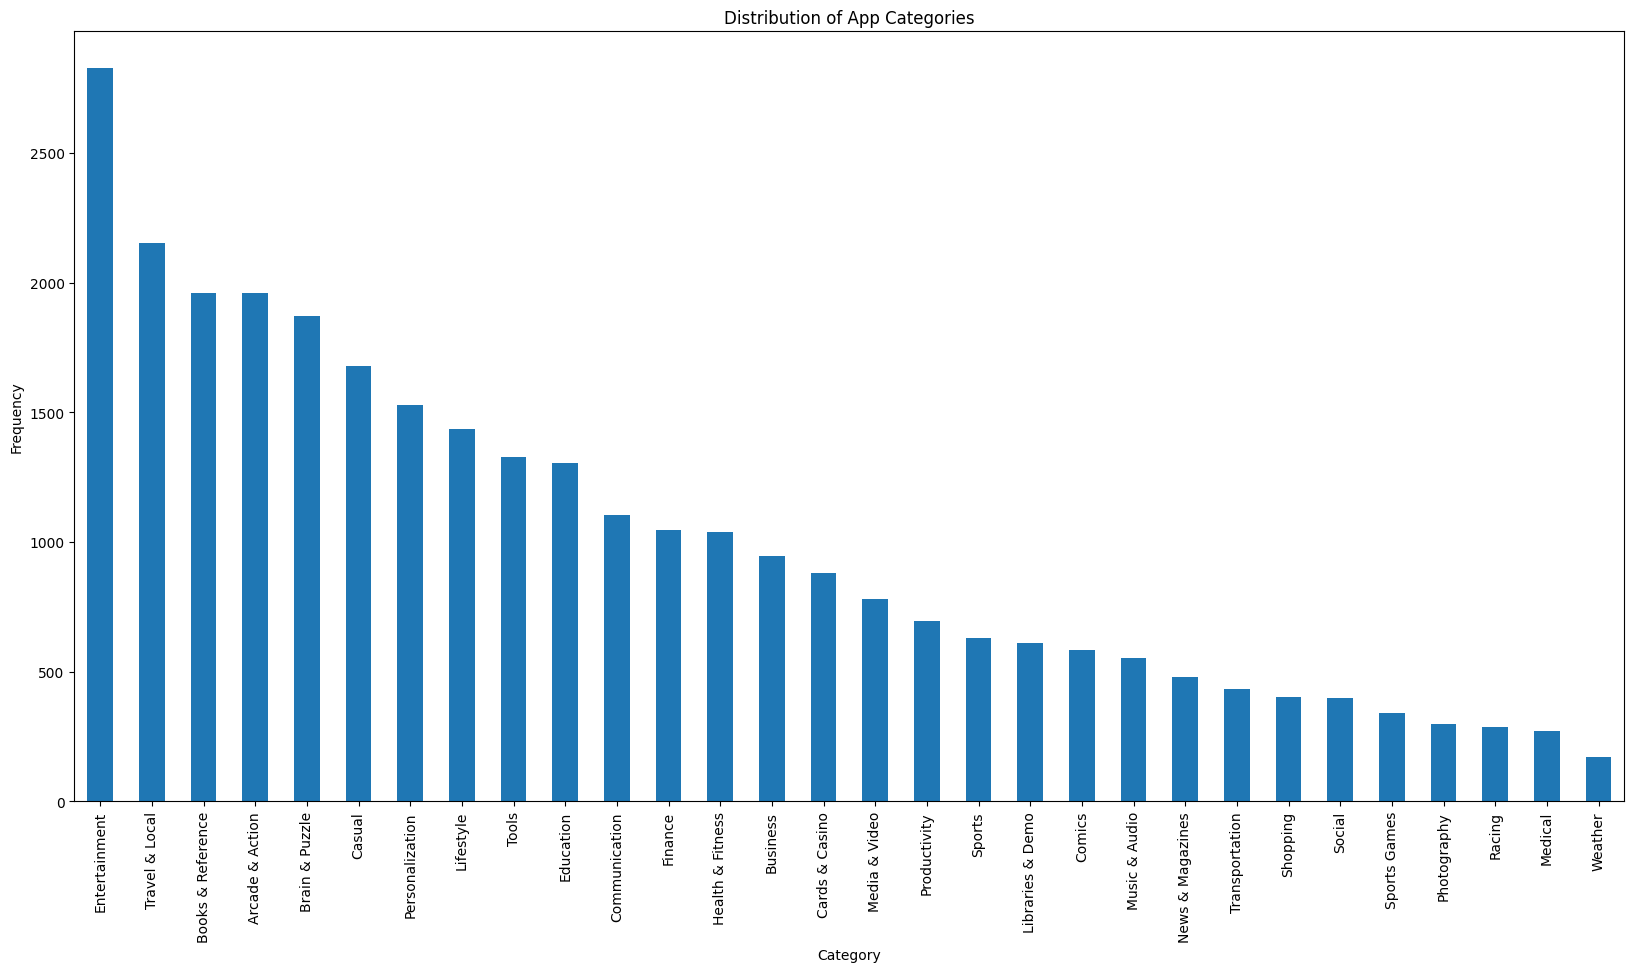

In [28]:
# Analyze the distribution of app categories:

category_counts = data['Category'].value_counts()
category_counts.plot(kind='bar', figsize=(20, 10))
plt.title('Distribution of App Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()


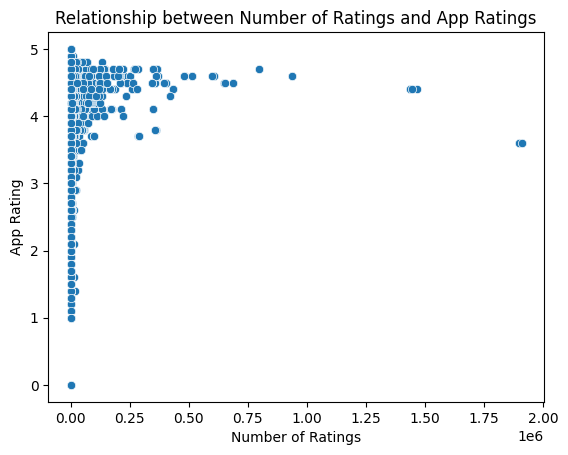

In [29]:
# Analyze the relationship between the number of ratings and app ratings:

import seaborn as sns

sns.scatterplot(x=data['Number of ratings'], y=data['Rating'])
# plt.figure(figsize=(10, 6))
plt.title('Relationship between Number of Ratings and App Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('App Rating')
plt.show()


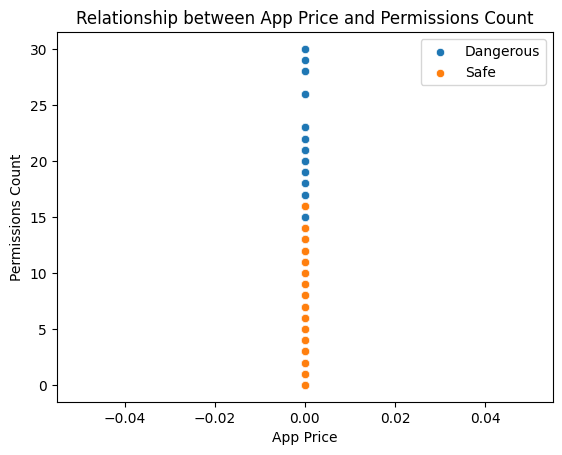

In [30]:
# Analyze the relationship between app price and permissions count:

# Convert price to numeric values
data['Price_numeric'] = data['Price'].apply(lambda x: float(x[1:]) if isinstance(x, str) and x.startswith('$') else 0)

sns.scatterplot(x=data['Price_numeric'], y=data['Dangerous permissions count'], label='Dangerous')
sns.scatterplot(x=data['Price_numeric'], y=data['Safe permissions count'], label='Safe')
# plt.figure(figsize=(10, 6))
plt.title('Relationship between App Price and Permissions Count')
plt.xlabel('App Price')
plt.ylabel('Permissions Count')
plt.legend(loc='upper right')
plt.show()



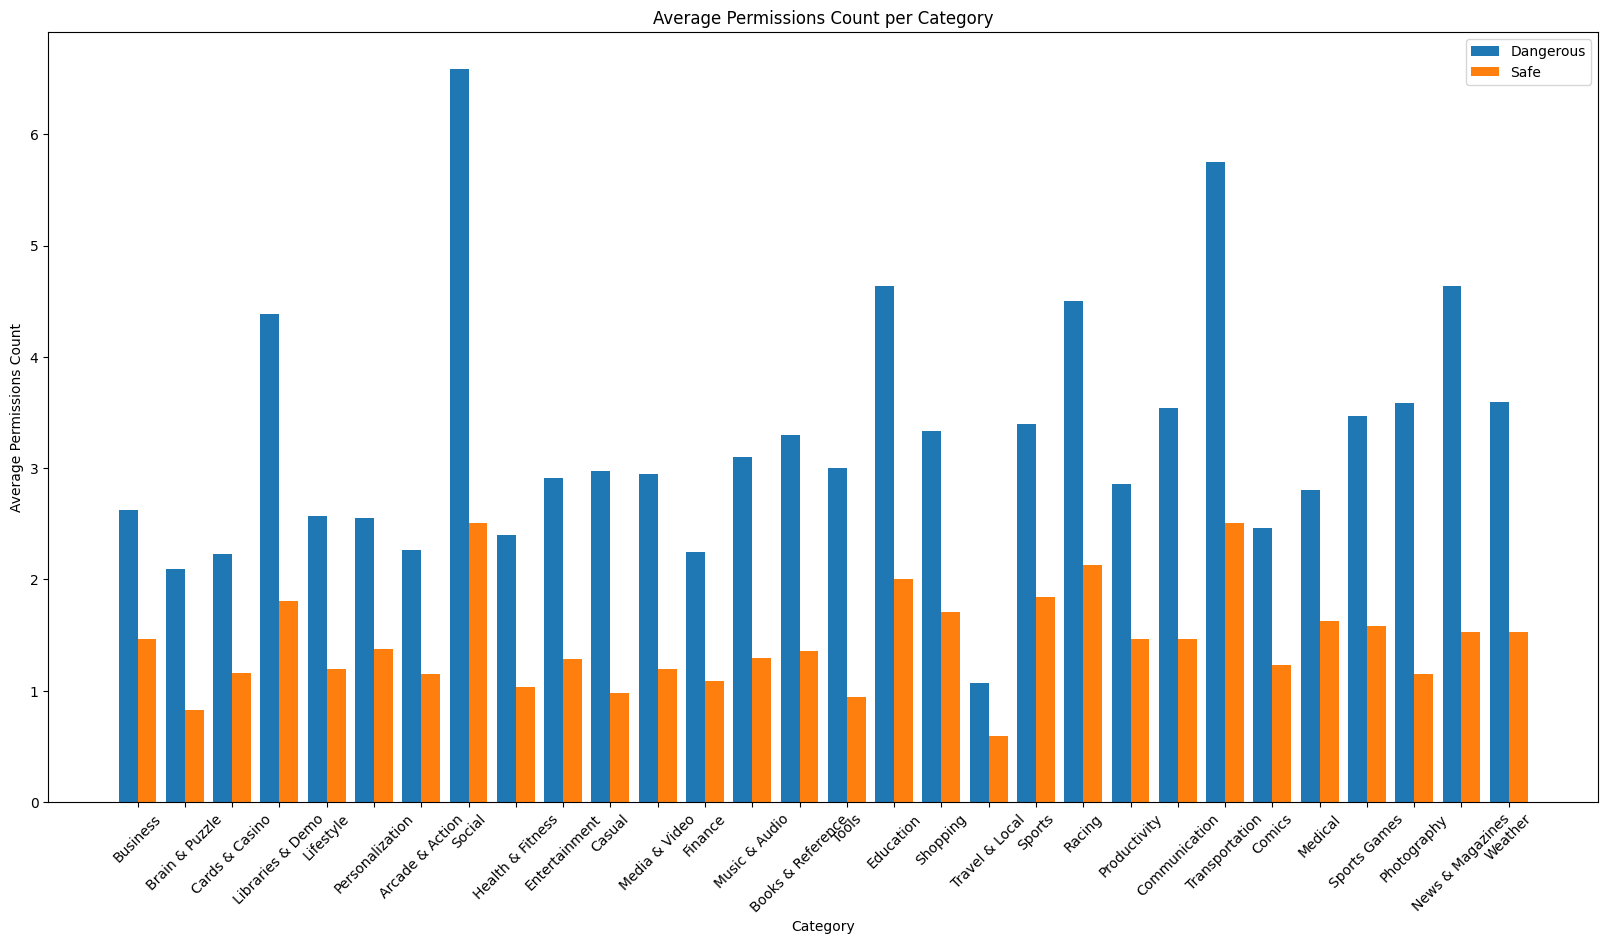

In [31]:
# Analyze the average permissions count per category:

import numpy as np

category_dangerous_mean = data.groupby('Category')['Dangerous permissions count'].mean()
category_safe_mean = data.groupby('Category')['Safe permissions count'].mean()

categories = data['Category'].unique()
x = np.arange(len(categories))
width = 0.4

fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(x - width/2, category_dangerous_mean, width, label='Dangerous')
rects2 = ax.bar(x + width/2, category_safe_mean, width, label='Safe')

ax.set_title('Average Permissions Count per Category')
ax.set_xlabel('Category')
ax.set_ylabel('Average Permissions Count')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45)
ax.legend()

plt.show()


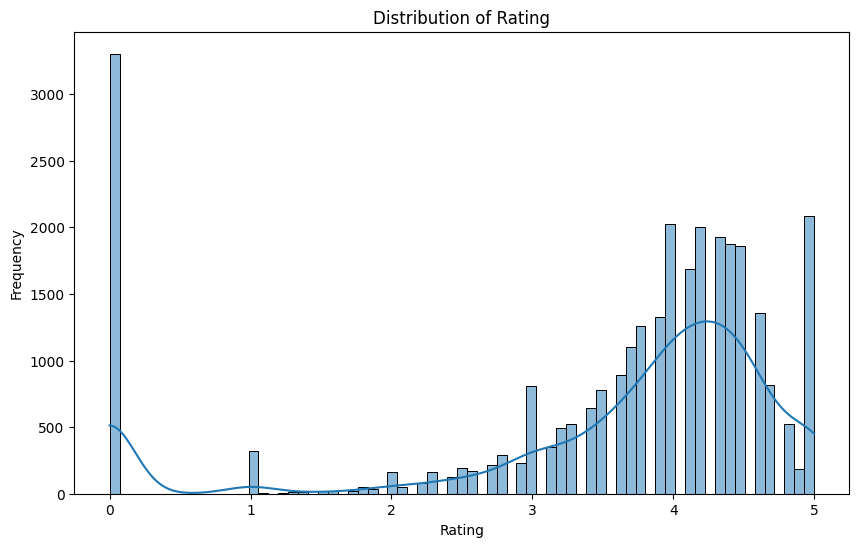

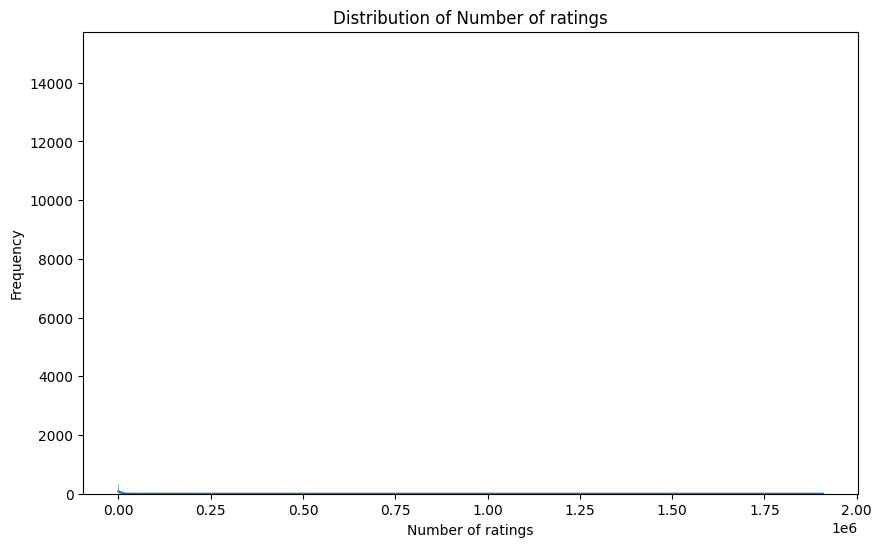

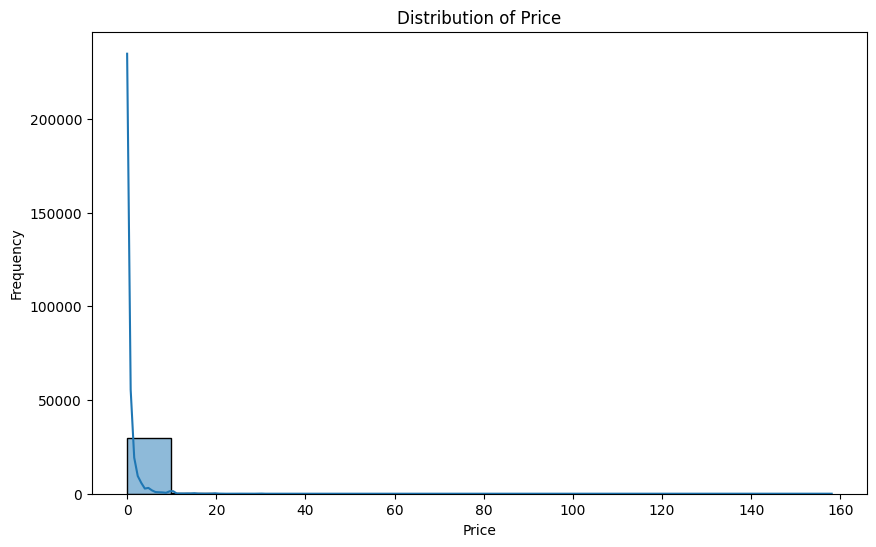

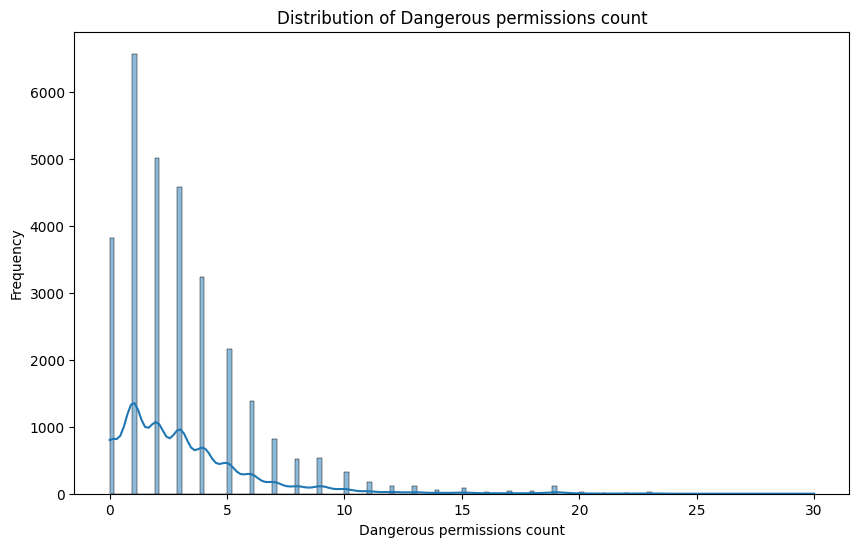

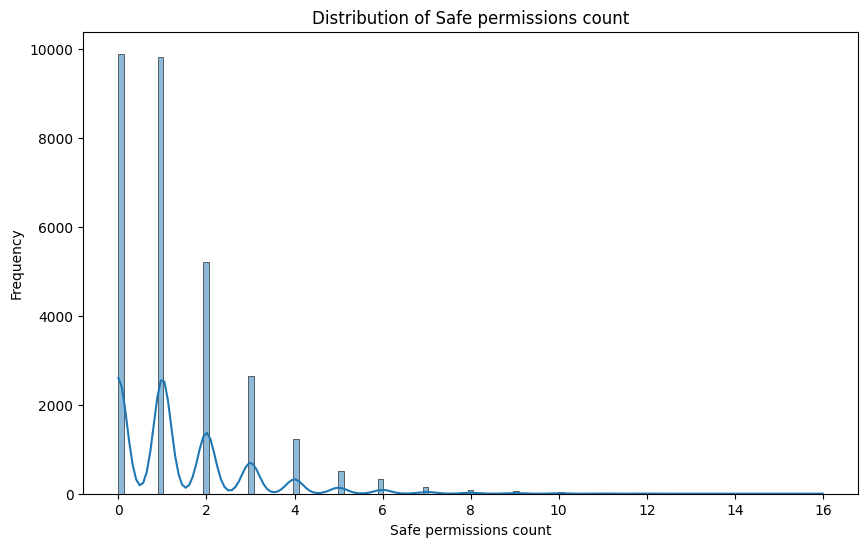

In [32]:
# Analyze the distribution of each feature

# Get the list of features
features = data.columns.tolist()

# Remove non-numeric features
features.remove('App')
features.remove('Package')
features.remove('Category')
features.remove('Description')
features.remove('Related apps')

count = 0
# Plot the distribution of each feature
for feature in features:
    if count < 5:
        plt.figure(figsize=(10, 6))
        sns.histplot(data[feature], kde=True)
        plt.title('Distribution of ' + feature)
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()
        count = count+1


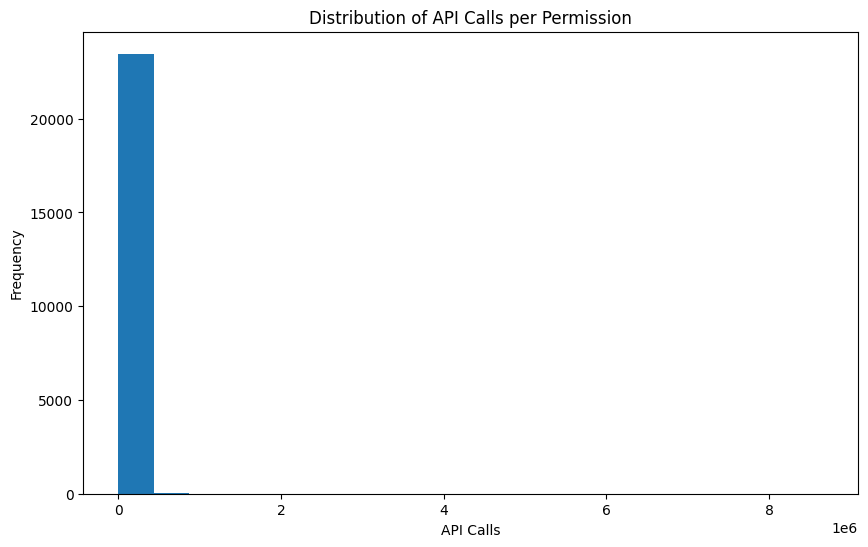

In [33]:
# distribution of the number of API calls per permission:

api_calls = data.groupby('Description')['Number of ratings'].sum()


plt.figure(figsize=(10, 6))
plt.hist(api_calls, bins=20)
plt.title('Distribution of API Calls per Permission')
plt.xlabel('API Calls')
plt.ylabel('Frequency')
plt.show()


# Test Model

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier,export_graphviz

In [35]:
import pandas as pd

# Convert x to a DataFrame (assuming it's 2D)
x_df = pd.DataFrame(x)

# Drop rows with missing values in x or y
x_df = x_df.dropna()
y_filtered = y[x_df.index]

# Convert back to NumPy arrays
x_filtered = x_df.to_numpy()

# Now you can split the data
X_train, X_test, y_train, y_test = train_test_split(x_filtered, y_filtered, test_size=0.2, random_state=42)


<ipython-input-35-14218202c3c5>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_filtered = y[x_df.index]


In [37]:
def logistic(X_train, X_test, y_train, y_test):
    reg=LogisticRegression(max_iter=200,n_jobs=-1).fit(X_train,y_train)
    y_predict=reg.predict(X_test)
    y_predict_train=reg.predict(X_train)
    precision_train = precision_score(y_train, y_predict_train)
    precision = precision_score(y_test, y_predict)
    accuracy = accuracy_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    roc_auc=roc_auc_score(y_test, y_predict)
    print(f"Training Accuracy %.2f"%(precision_train))
    print(f"Test Accuracy %.2f"%(precision))
    print(f"Recall Score %.2f"%(recall))
    print(f'ROC Score %.2f'%(roc_auc))
    return reg

In [38]:
logistic(X_train, X_test, y_train, y_test)

Training Accuracy 0.56
Test Accuracy 0.50
Recall Score 0.33
ROC Score 0.50


LogisticRegression(max_iter=200, n_jobs=-1)

In [39]:
def Naive(X_train, X_test, y_train, y_test):
    reg=GaussianNB().fit(X_train,y_train)
    y_predict=reg.predict(X_test)
    y_predict_train=reg.predict(X_train)
    precision_train = precision_score(y_train, y_predict_train)
    precision = precision_score(y_test, y_predict)
    accuracy = accuracy_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    roc_auc=roc_auc_score(y_test, y_predict)
    print(f"Training Accuracy %.2f"%(precision_train))
    print(f"Test Accuracy %.2f"%(precision))
    print(f"Recall Score %.2f"%(recall))
    print(f'ROC Score %.2f'%(roc_auc))
    return reg

In [40]:
Naive(X_train, X_test, y_train, y_test)

Training Accuracy 0.60
Test Accuracy 0.50
Recall Score 0.33
ROC Score 0.50


GaussianNB()

In [41]:
from io import StringIO
import pydotplus
from IPython.display import Image

In [42]:
def visualize_dtree(reg, columns, sample_type, name = 'dt') :
    dot_data = StringIO()
    export_graphviz(reg, out_file = dot_data,
                    filled = True, rounded=True,
                    special_characters = True,feature_names = columns, class_names = ['Benign','Malware'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    Image(graph.create_png())


In [43]:
def dtree(X_train, X_test, y_train, y_test):
    reg=DecisionTreeClassifier(max_features='sqrt',max_depth=10,max_leaf_nodes=10).fit(X_train,y_train)
    y_predict=reg.predict(X_test)
    y_predict_train=reg.predict(X_train)
    precision_train = precision_score(y_train, y_predict_train)
    precision = precision_score(y_test, y_predict)
    accuracy = accuracy_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    roc_auc=roc_auc_score(y_test, y_predict)
    print(f"Training Accuracy %.2f"%(precision_train))
    print(f"Test Accuracy %.2f"%(precision))
    print(f"Recall Score %.2f"%(recall))
    print(f'ROC Score %.2f'%(roc_auc))
    return reg

In [44]:
print(X_train.shape)


(24, 1)


In [45]:
# Check the shape of X_train and X_test
print(X_train.shape)  # Should match the number of feature names you're passing
print(len(df_permission.columns[:-1]))  # This should match X_train's second dimension (number of features)


(24, 1)
173


In [46]:
# Ensure you're passing the right features from df_permission
x = df_permission.iloc[:, :-1]  # All columns except the last (assuming the last column is the target)
y = df_permission['Class']  # Assuming 'Class' is the target variable

# Now re-split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [47]:
reg = dtree(X_train, X_test, y_train, y_test)
visualize_dtree(reg, df_permission.columns[:-1], unsampled)

Training Accuracy 0.67
Test Accuracy 0.67
Recall Score 1.00
ROC Score 0.50


# Confusion Matrix using different techniques

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


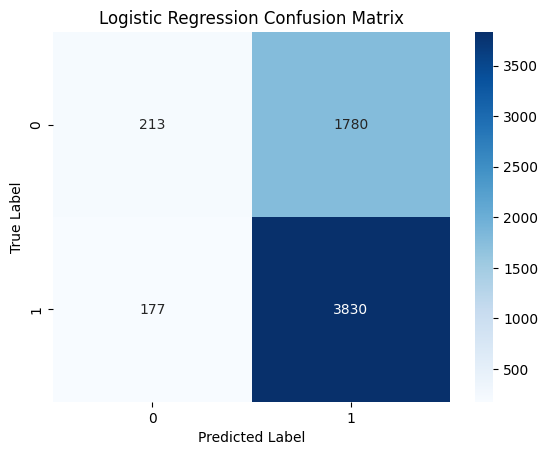

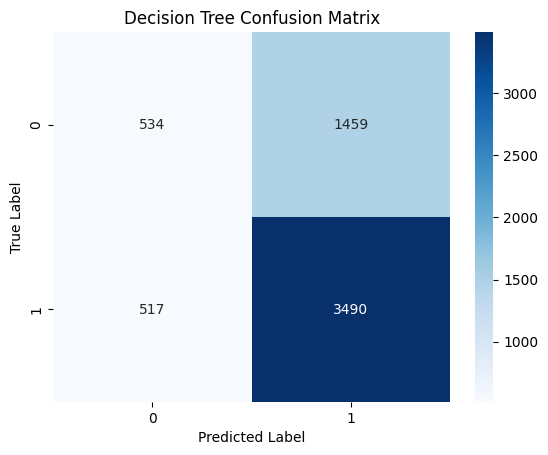

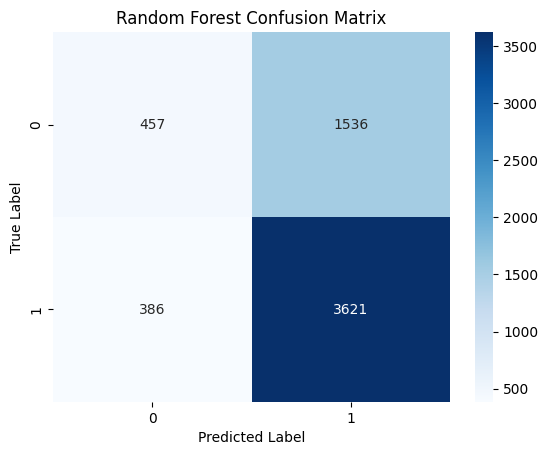

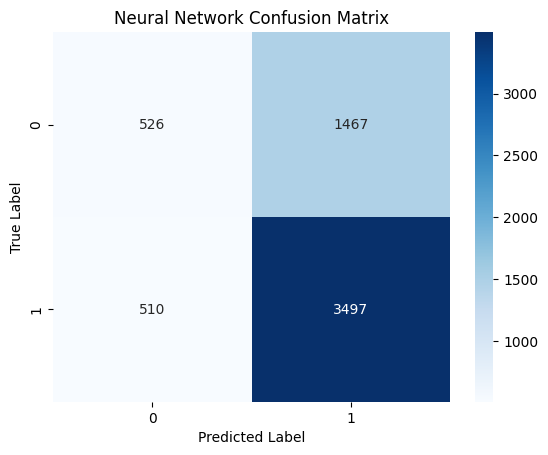

Logistic Regression:
               precision    recall  f1-score   support

           0       0.55      0.11      0.18      1993
           1       0.68      0.96      0.80      4007

    accuracy                           0.67      6000
   macro avg       0.61      0.53      0.49      6000
weighted avg       0.64      0.67      0.59      6000

Decision Tree:
               precision    recall  f1-score   support

           0       0.51      0.27      0.35      1993
           1       0.71      0.87      0.78      4007

    accuracy                           0.67      6000
   macro avg       0.61      0.57      0.57      6000
weighted avg       0.64      0.67      0.64      6000

Random Forest:
               precision    recall  f1-score   support

           0       0.54      0.23      0.32      1993
           1       0.70      0.90      0.79      4007

    accuracy                           0.68      6000
   macro avg       0.62      0.57      0.56      6000
weighted avg       0

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train and evaluate logistic regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)

lr_cm = confusion_matrix(y_test, lr_y_pred)
lr_cr = classification_report(y_test, lr_y_pred)

# Train and evaluate decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

dt_cm = confusion_matrix(y_test, dt_y_pred)
dt_cr = classification_report(y_test, dt_y_pred)

# Train and evaluate random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

rf_cm = confusion_matrix(y_test, rf_y_pred)
rf_cr = classification_report(y_test, rf_y_pred)

# Train and evaluate neural network model
nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train, y_train)
nn_y_pred = nn_model.predict(X_test)

nn_cm = confusion_matrix(y_test, nn_y_pred)
nn_cr = classification_report(y_test, nn_y_pred)

# Plot confusion matrix for each model
sns.heatmap(lr_cm, annot=True, fmt='g', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

sns.heatmap(dt_cm, annot=True, fmt='g', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

sns.heatmap(rf_cm, annot=True, fmt='g', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

sns.heatmap(nn_cm, annot=True, fmt='g', cmap='Blues')
plt.title("Neural Network Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Print classification report for each model
print("Logistic Regression:\n", lr_cr)
print("Decision Tree:\n", dt_cr)
print("Random Forest:\n", rf_cr)
print("Neural Network:\n", nn_cr)


In [49]:
# Calculate accuracy
lr_accuracy = accuracy_score(y_test, lr_y_pred)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
nn_accuracy = accuracy_score(y_test, nn_y_pred)

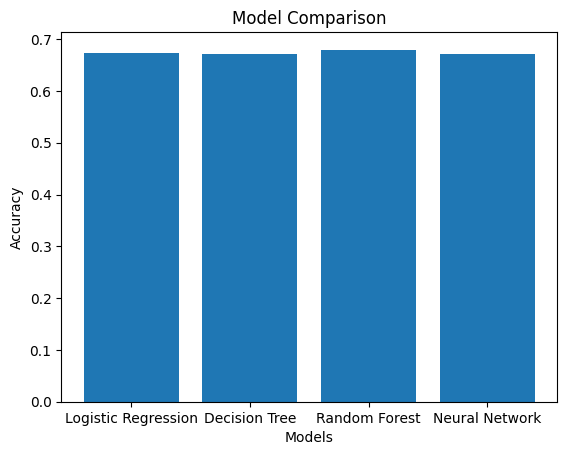

In [50]:
import matplotlib.pyplot as plt

# Plot the accuracies
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Neural Network']
accuracies = [lr_accuracy, dt_accuracy, rf_accuracy, nn_accuracy]

plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()

# Feature Selection:


In [51]:
# Select the features and target variable
X = df[['Number of ratings', 'Dangerous permissions count', 'Safe permissions count']]
y = df['Rating']

In [56]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Select the features and target variable
X = df[['Number of ratings', 'Dangerous permissions count', 'Safe permissions count']]
y = df['Rating']

# Train a linear regression model with RFE
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=2)
# rfe.fit(X, y)

# Print the selected features
# print('Selected Features:', X.columns[rfe.support_])

In [57]:
from sklearn.impute import SimpleImputer

# Create an imputer object to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Impute missing values in X
X_imputed = imputer.fit_transform(X)

# Fit the RFE model with imputed data
rfe = RFE(lr, n_features_to_select=2)
rfe.fit(X_imputed, y)

# Print the selected features
print('Selected Features:', X.columns[rfe.support_])


Selected Features: Index(['Dangerous permissions count', 'Safe permissions count'], dtype='object')


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Select the features and target variable
X = df[['Dangerous permissions count', 'Safe permissions count']]
y = df['Rating'].apply(lambda x: 1 if x >= 4 else 0)

# Impute missing values in X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Train and evaluate a logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Logistic Regression Accuracy:', acc)

# Train and evaluate a decision tree classification model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Decision Tree Classification Accuracy:', acc)

# Train and evaluate a random forest classification model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Random Forest Classification Accuracy:', acc)


Logistic Regression Accuracy: 0.5535
Decision Tree Classification Accuracy: 0.568
Random Forest Classification Accuracy: 0.5678333333333333


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Select the features and target variable
X = df[['Number of ratings', 'Dangerous permissions count', 'Safe permissions count']]
y = df['Rating']

# Impute missing values in X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Train and evaluate a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Linear Regression MSE:', mse)

# Train and evaluate a decision tree regression model
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Decision Tree Regression MSE:', mse)

# Train and evaluate a random forest regression model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Random Forest Regression MSE:', mse)


Linear Regression MSE: 1.989277330220389
Decision Tree Regression MSE: 0.5189402092406017
Random Forest Regression MSE: 0.46394419894918776


# Clustering

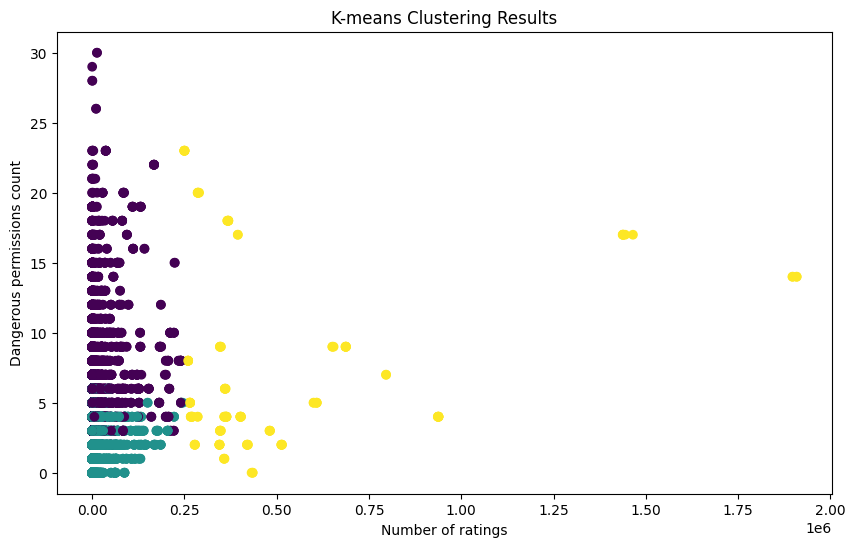

In [62]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Select the features
X = df[['Number of ratings', 'Dangerous permissions count', 'Safe permissions count']]

# Impute missing values in X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Add the cluster labels to the dataframe
df['Cluster'] = labels

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Number of ratings'], df['Dangerous permissions count'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Number of ratings')
plt.ylabel('Dangerous permissions count')
plt.title('K-means Clustering Results')
plt.show()


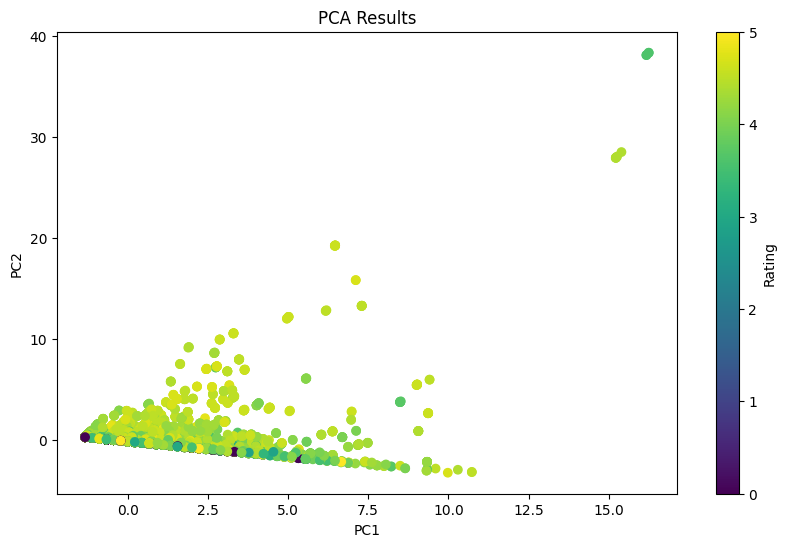

In [64]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Select the features
X = df[['Number of ratings', 'Dangerous permissions count', 'Safe permissions count']]

# Impute missing values in X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Perform PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

# Plot the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Rating'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Results')
plt.colorbar(label='Rating')  # Optional: Add a colorbar for better interpretation
plt.show()


In [66]:
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer

# Select the features
X = df[['Number of ratings', 'Dangerous permissions count', 'Safe permissions count']]

# Impute missing values in X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Detect anomalies with Isolation Forest
iforest = IsolationForest(contamination=0.05, random_state=42)
iforest.fit(X_imputed)
labels = iforest.predict(X_imputed)

# Add the anomaly labels to the dataframe
df['Anomaly'] = labels

# Print the number of anomalies
print('Number of Anomalies:', len(df[df['Anomaly'] == -1]))


Number of Anomalies: 1499


# Sampling


In [67]:
!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [68]:
# oversample = RandomOverSampler(sampling_strategy=0.9)
# X_over, y_over = oversample.fit_resample(x, y)
# X_over, y_over

In [69]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Assuming df is your DataFrame and 'Rating' is the target variable
# Convert continuous ratings to binary classes
y = df['Rating'].apply(lambda x: 1 if x >= 4 else 0)  # Example threshold
x = df[['Number of ratings', 'Dangerous permissions count', 'Safe permissions count']]  # Your feature set

# Initialize RandomOverSampler
oversample = RandomOverSampler(sampling_strategy=0.9)

# Fit and resample
X_over, y_over = oversample.fit_resample(x, y)

# Output the resampled data
print(X_over, y_over)


       Number of ratings  Dangerous permissions count  Safe permissions count
0                     77                          7.0                       1
1                    199                          3.0                       2
2                    243                          1.0                       1
3                   2589                          0.0                       0
4                      0                          1.0                       0
...                  ...                          ...                     ...
31052                  6                          3.0                       1
31053                  0                          3.0                       1
31054                  5                          4.0                       2
31055                130                          1.0                       0
31056                936                          5.0                       2

[31057 rows x 3 columns] 0        0
1        1
2        1
3    

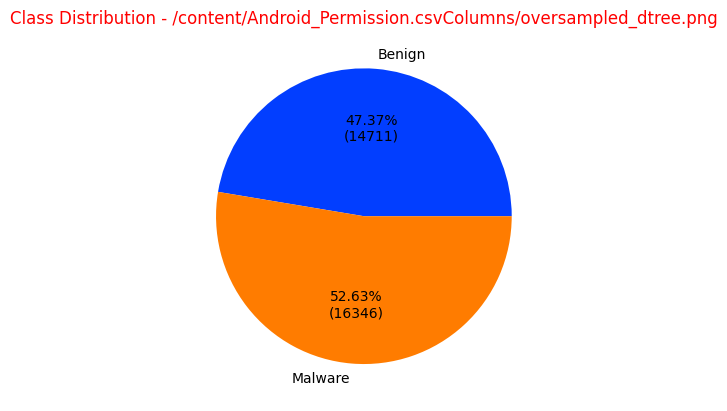

In [70]:
plot_class_distribution(y_over, oversampled)

In [71]:
X_over_train, X_over_test, y_over_train, y_over_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

In [72]:
# Fill missing values with the mean or median
X_over_train = X_over_train.fillna(X_over_train.mean())
X_over_test = X_over_test.fillna(X_over_test.mean())


In [73]:
logistic(X_over_train, X_over_test, y_over_train, y_over_test)

Training Accuracy 0.64
Test Accuracy 0.64
Recall Score 0.55
ROC Score 0.60


LogisticRegression(max_iter=200, n_jobs=-1)

In [74]:
Naive(X_over_train, X_over_test, y_over_train, y_over_test)

Training Accuracy 0.77
Test Accuracy 0.79
Recall Score 0.12
ROC Score 0.54


GaussianNB()

In [75]:
reg_over = dtree(X_over_train, X_over_test, y_over_train, y_over_test)


Training Accuracy 0.58
Test Accuracy 0.59
Recall Score 0.99
ROC Score 0.61


In [76]:
# Train the decision tree model
reg_over = dtree(X_over_train, X_over_test, y_over_train, y_over_test)

# Define the correct feature names
feature_names = ['Number of ratings', 'Dangerous permissions count', 'Safe permissions count']

# Visualize the decision tree
visualize_dtree(reg_over, feature_names, oversampled)


Training Accuracy 0.60
Test Accuracy 0.60
Recall Score 1.00
ROC Score 0.63


In [77]:
undersample = RandomUnderSampler(sampling_strategy=0.9)
X_under, y_under = undersample.fit_resample(x, y)

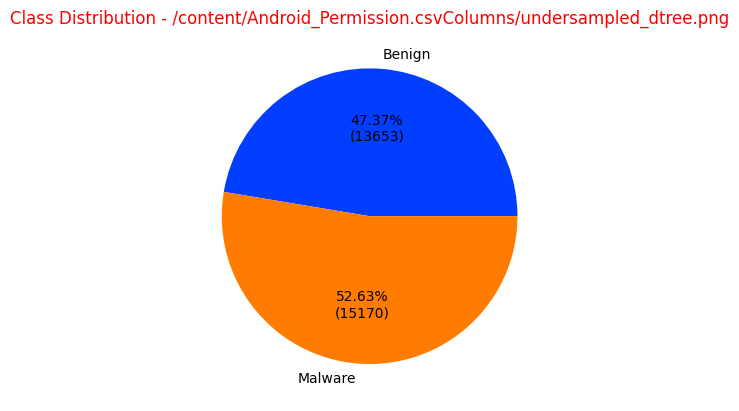

In [78]:
plot_class_distribution(y_under, undersampled)

In [79]:
X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42)

In [82]:
from sklearn.impute import SimpleImputer

# Option 2: Impute missing values with mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both train and test sets
X_under_train_imputed = imputer.fit_transform(X_under_train)
X_under_test_imputed = imputer.transform(X_under_test)

# Fit your models with imputed data
logistic(X_under_train_imputed, X_under_test_imputed, y_under_train, y_under_test)
Naive(X_under_train_imputed, X_under_test_imputed, y_under_train, y_under_test)


Training Accuracy 0.64
Test Accuracy 0.63
Recall Score 0.55
ROC Score 0.60
Training Accuracy 0.76
Test Accuracy 0.72
Recall Score 0.11
ROC Score 0.53


GaussianNB()

In [84]:
# Assuming X_under_train is a NumPy array or pandas DataFrame
feature_names = [f"Feature {i+1}" for i in range(X_under_train.shape[1])]  # Replace with actual feature names if available

# Train the decision tree
reg_under = dtree(X_under_train, X_under_test, y_under_train, y_under_test)

# Visualize the decision tree
visualize_dtree(reg_under, feature_names, undersampled)


Training Accuracy 0.60
Test Accuracy 0.59
Recall Score 1.00
ROC Score 0.62


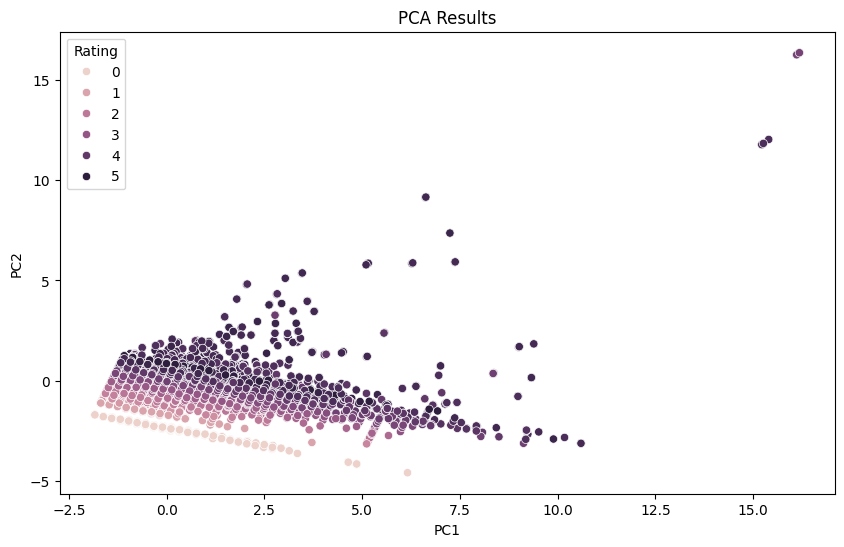

In [86]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Select the columns for PCA
columns = ['Rating', 'Number of ratings', 'Dangerous permissions count', 'Safe permissions count']

# Replace missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')
df[columns] = imputer.fit_transform(df[columns])

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[columns])

# Perform PCA
pca = PCA(n_components=2)
pca.fit(data_scaled)
data_pca = pca.transform(data_scaled)

# Create a new dataframe with the PCA results
df_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])

# Add the original columns to the new dataframe
df_pca['Rating'] = df['Rating']
df_pca['Number of ratings'] = df['Number of ratings']
df_pca['Dangerous permissions count'] = df['Dangerous permissions count']
df_pca['Safe permissions count'] = df['Safe permissions count']

# Plot the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Rating', data=df_pca)
plt.title('PCA Results')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [87]:
pca = PCA(n_components=100)
principalComponents = pca.fit_transform(df_permission)
features = range(pca.n_components_)
PCA_components = pd.DataFrame(principalComponents)
ratios = pca.explained_variance_ratio_*100
PCA_components

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.612592,-0.113919,0.341604,-0.264478,0.857759,0.033131,-0.894365,-0.872250,-0.206956,0.016809,...,0.017119,-0.020963,0.022428,-0.006393,-0.022476,-0.011236,0.008058,-0.005052,-0.010233,0.002447
1,0.537263,-0.959392,0.029070,0.163764,0.323698,0.395098,0.157825,-0.220064,-0.327654,-0.187691,...,-0.003473,0.001146,0.004858,-0.001154,0.000680,-0.006232,-0.004477,-0.002350,0.002181,-0.003524
2,-0.358122,-0.778455,0.548514,-0.176471,-0.047894,-0.134875,-0.342867,-0.042096,0.057210,-0.017441,...,0.000678,-0.000157,0.000483,0.000596,0.000645,-0.000037,-0.000497,-0.000149,-0.000814,-0.000172
3,-1.040884,-0.253041,-0.097812,-0.724516,0.334791,0.194505,0.031284,0.096886,0.074205,-0.345226,...,0.000634,-0.000427,0.000891,-0.000245,0.000724,0.000373,-0.000549,-0.000095,-0.000676,0.000246
4,-0.844238,0.216786,0.003093,0.138539,-0.138238,0.014237,-0.043550,-0.046193,-0.017493,0.413795,...,0.000956,0.000121,0.000653,-0.000540,-0.000177,0.000138,-0.000101,-0.000039,-0.000483,-0.000950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,-0.471314,0.821622,0.374594,-0.089226,0.085963,0.102239,-0.276633,-0.164893,-0.012306,0.478833,...,0.002414,-0.004542,0.004982,-0.001990,-0.008764,-0.005125,-0.005355,0.007896,0.011295,-0.006591
29995,0.348794,-0.220970,-0.500583,0.631356,0.116301,-0.640473,-0.534902,0.440096,-0.520801,-0.092819,...,-0.003385,-0.000917,0.008576,-0.001500,-0.003917,-0.006576,-0.000950,0.002424,0.003186,-0.006735
29996,0.635056,-0.264675,-0.269934,0.659460,-0.189282,0.344642,0.225867,-0.264529,-0.094889,-0.457320,...,-0.000948,0.005870,-0.012625,-0.001719,-0.016890,-0.006481,0.002222,0.000447,0.006674,-0.000264
29997,-0.313022,1.042673,0.777041,-0.172007,0.250594,0.002835,0.052719,0.246948,-0.044287,0.309337,...,-0.000974,-0.000208,0.000725,-0.000910,-0.000963,0.001722,0.000483,0.000391,-0.000465,-0.000099


In [88]:
def plot_pca(features, ratios):
    plt.figure(figsize=(10, 6))
    plt.xlabel('PCA features')
    plt.ylabel('variance Percentage')
    plt.xticks(features, rotation=70)
    name = 'PCA features vs Variance Percentage'
    plt.title(name)
    plt.tight_layout()
    plt.bar(features, ratios, color=sns.color_palette("flare"))
    plt.savefig(plots_path + name + '.png', bbox_inches = 'tight')
    plt.show()

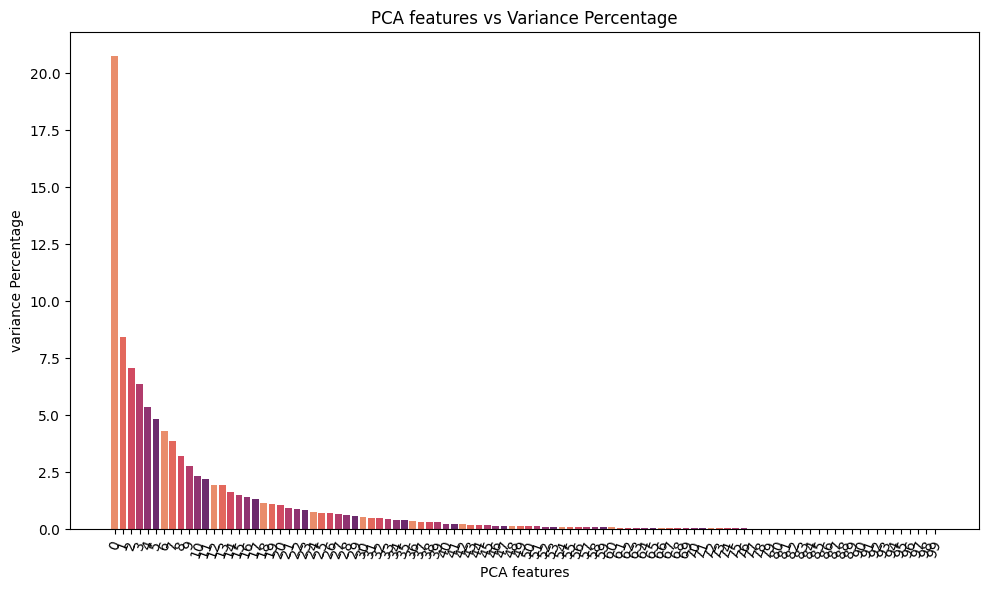

In [89]:
plot_pca(features, ratios)

In [90]:
temp_df=pd.DataFrame(pca.inverse_transform(principalComponents))
temp_df

,0,1,2,3,4,5,6,7,8,9,...,164,165,166,167,168,169,170,171,172,173
0,0.002689,0.000378,-2.371511e-15,0.001030,-0.000261,0.004049,-0.000523,1.905029e-16,0.001595,0.000416,...,0.000383,1.000103,-6.697938e-05,0.001348,-0.000214,-0.004287,-0.000022,0.999832,-0.001727,1.298842e-06
1,0.000708,0.000556,4.146388e-16,-0.001901,0.000058,-0.000927,0.000446,1.508526e-17,0.000683,0.000313,...,-0.000028,-0.000014,-2.256551e-05,-0.000730,0.002165,-0.000653,0.000148,0.000019,0.000855,1.454198e-07
2,0.000183,-0.000009,1.434920e-16,0.000195,0.000066,0.000107,-0.000120,-1.958132e-17,0.000267,0.000177,...,0.000005,-0.000001,-1.368271e-06,-0.000112,-0.000135,0.000016,0.000019,0.000005,0.000131,1.466148e-06
3,0.000194,0.000036,1.773165e-16,0.000031,0.000042,0.000051,-0.000087,-6.235354e-17,0.000208,0.000027,...,0.000009,-0.000001,-6.719173e-07,0.000175,-0.000105,0.000017,0.000018,0.000003,-0.000180,1.315858e-06
4,-0.000164,-0.000003,-1.654485e-16,0.000193,0.000010,-0.000026,-0.000025,-8.148151e-17,0.000006,0.000038,...,0.000005,-0.000001,-4.774931e-06,0.000009,0.000154,-0.000081,0.000010,0.000005,0.000038,9.999996e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,-0.000260,-0.000218,-1.460429e-15,-0.000586,0.000299,0.001231,-0.000836,1.029941e-15,0.001130,-0.000697,...,-0.000056,-0.000029,3.078669e-05,0.000652,0.001399,0.000891,0.000294,0.000048,-0.000245,1.000011e+00
29995,0.001423,0.000978,3.075559e-16,-0.000241,0.000214,-0.002009,0.000096,-7.861540e-17,0.000054,0.000363,...,0.000026,0.000029,-2.539919e-05,-0.001268,0.003341,-0.002058,0.000063,-0.000046,0.001299,9.999975e-01
29996,-0.001083,0.000607,7.002374e-16,-0.004716,-0.001154,-0.000628,0.002136,2.492945e-17,-0.000417,-0.001608,...,0.000226,0.000045,-2.953552e-05,-0.000454,0.000356,0.000232,-0.000005,-0.000029,0.000523,9.999950e-01
29997,0.000229,-0.000014,-7.978584e-16,-0.000324,-0.000050,0.000018,-0.000107,-1.782499e-16,0.000152,-0.000006,...,0.000002,0.000005,7.252903e-06,-0.000311,-0.000032,-0.000315,0.000031,0.000002,0.000358,9.999991e-01


In [91]:
temp_df[temp_df<=0]=0
temp_df[temp_df!=0]=1

In [92]:
temp_df=temp_df.astype(int)
temp_df.index=df['App']
temp_df

,0,1,2,3,4,5,6,7,8,9,...,164,165,166,167,168,169,170,171,172,173
App,,,,,,,,,,,,,,,,,,,,,
Canada Post Corporation,1,1,0,1,0,1,0,1,1,1,...,1,1,0,1,0,0,0,1,0,1
Word Farm,1,1,1,0,1,0,1,1,1,1,...,0,0,0,0,1,0,1,1,1,1
Fortunes of War FREE,1,0,1,1,1,1,0,0,1,1,...,1,0,0,0,0,1,1,1,1,1
Better Keyboard: Avatar Purple,1,1,1,1,1,1,0,0,1,1,...,1,0,0,1,0,1,1,1,0,1
Boxing Day,0,0,0,1,1,0,0,0,1,1,...,1,0,0,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Beechwood Hotel,0,0,0,0,1,1,0,1,1,0,...,0,0,1,1,1,1,1,1,0,1
ZDefense: Tower Defense,1,1,1,0,1,0,1,0,1,1,...,1,1,0,0,1,0,1,0,1,1
Super Task Killer FREE,0,1,1,0,0,0,1,1,0,0,...,1,1,0,0,1,1,0,0,1,1


In [93]:
#features vs Variance Percentage.png
df_y=df['Class']
df_y.index=df['App']

In [94]:
df_feature=pd.concat([temp_df.iloc[:,:10],df_y],axis=1)
df_feature

,0,1,2,3,4,5,6,7,8,9,Class
App,,,,,,,,,,,
Canada Post Corporation,1,1,0,1,0,1,0,1,1,1,0
Word Farm,1,1,1,0,1,0,1,1,1,1,0
Fortunes of War FREE,1,0,1,1,1,1,0,0,1,1,0
Better Keyboard: Avatar Purple,1,1,1,1,1,1,0,0,1,1,0
Boxing Day,0,0,0,1,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
Beechwood Hotel,0,0,0,0,1,1,0,1,1,0,1
ZDefense: Tower Defense,1,1,1,0,1,0,1,0,1,1,1
Super Task Killer FREE,0,1,1,0,0,0,1,1,0,0,1


In [95]:
X_feature=df_feature.iloc[:,:-1]
y_feature=df_feature.iloc[:,-1]

In [96]:
X_feature_train, X_feature_test, y_feature_train, y_feature_test = train_test_split(X_feature, y_feature, test_size=0.2, random_state=42)
X_feature_train.shape,X_feature_test.shape,y_feature_train.shape,y_feature_test.shape

((23999, 10), (6000, 10), (23999,), (6000,))

In [97]:
logistic(X_feature_train, X_feature_test, y_feature_train, y_feature_test)

Training Accuracy 0.79
Test Accuracy 0.79
Recall Score 0.91
ROC Score 0.71


LogisticRegression(max_iter=200, n_jobs=-1)

In [98]:
Naive(X_feature_train, X_feature_test, y_feature_train, y_feature_test)

Training Accuracy 0.78
Test Accuracy 0.79
Recall Score 0.79
ROC Score 0.69


GaussianNB()

In [99]:
reg_feature = dtree(X_feature_train, X_feature_test, y_feature_train, y_feature_test)
visualize_dtree(reg_feature, df_feature.columns[:-1], unsampled, 'pca_dt')

Training Accuracy 0.76
Test Accuracy 0.76
Recall Score 0.99
ROC Score 0.68


In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
def randomforest(X_train, X_test, y_train, y_test) :
    reg = RandomForestClassifier(n_estimators=200, n_jobs = -1).fit(X_train,y_train)
    y_predict=reg.predict(X_test)
    y_predict_train=reg.predict(X_train)
    precision_train = precision_score(y_train, y_predict_train)
    precision = precision_score(y_test, y_predict)
    accuracy = accuracy_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    roc_auc=roc_auc_score(y_test, y_predict)
    print(f"Training Accuracy %.2f"%(precision_train))
    print(f"Test Accuracy %.2f"%(precision))
    print(f"Recall Score %.2f"%(recall))
    print(f'ROC Score %.2f'%(roc_auc))
    return reg

In [103]:
randomforest(X_feature_train, X_feature_test, y_feature_train, y_feature_test)

Training Accuracy 0.86
Test Accuracy 0.85
Recall Score 0.93
ROC Score 0.81


RandomForestClassifier(n_estimators=200, n_jobs=-1)

In [104]:
import xgboost as xgb

In [105]:
def xgboost(X_train, X_test, y_train, y_test) :
    reg = GridSearchCV(estimator = xgb.XGBClassifier(scale_pos_weight = 0.5, n_jobs = -1), param_grid={}, cv = 10)
    reg = reg.fit(X_train,y_train)
    y_predict=reg.predict(X_test)
    y_predict_train=reg.predict(X_train)
    precision_train = precision_score(y_train, y_predict_train)
    precision = precision_score(y_test, y_predict)
    accuracy = accuracy_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    roc_auc=roc_auc_score(y_test, y_predict)
    print(f"Training Accuracy %.2f"%(precision_train))
    print(f"Test Accuracy %.2f"%(precision))
    print(f"Recall Score %.2f"%(recall))
    print(f'ROC Score %.2f'%(roc_auc))
    return reg

In [107]:
xgboost(X_feature_train, X_feature_test, y_feature_train, y_feature_test)

Training Accuracy 0.91
Test Accuracy 0.90
Recall Score 0.84
ROC Score 0.83


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={})

In [108]:
from sklearn import svm

In [109]:
def svm_classfier(X_train, X_test, y_train, y_test) :
    reg = svm.SVC().fit(X_train,y_train)
    y_predict=reg.predict(X_test)
    y_predict_train=reg.predict(X_train)
    precision_train = precision_score(y_train, y_predict_train)
    precision = precision_score(y_test, y_predict)
    accuracy = accuracy_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    roc_auc=roc_auc_score(y_test, y_predict)
    print(f"Training Accuracy %.2f"%(precision_train))
    print(f"Test Accuracy %.2f"%(precision))
    print(f"Recall Score %.2f"%(recall))
    print(f'ROC Score %.2f'%(roc_auc))
    return reg

In [110]:
svm_classfier(X_feature_train, X_feature_test, y_feature_train, y_feature_test)

Training Accuracy 0.84
Test Accuracy 0.85
Recall Score 0.95
ROC Score 0.80


SVC()

In [111]:
from sklearn.neural_network import MLPClassifier

In [112]:
def mlp(X_train, X_test, y_train, y_test) :
    reg = MLPClassifier(random_state = 42, max_iter = 300).fit(X_train,y_train)
    y_predict=reg.predict(X_test)
    y_predict_train=reg.predict(X_train)
    precision_train = precision_score(y_train, y_predict_train)
    precision = precision_score(y_test, y_predict)
    accuracy = accuracy_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    roc_auc=roc_auc_score(y_test, y_predict)
    print(f"Training Accuracy %.2f"%(precision_train))
    print(f"Test Accuracy %.2f"%(precision))
    print(f"Recall Score %.2f"%(recall))
    print(f'ROC Score %.2f'%(roc_auc))
    return reg

In [113]:
mlp(X_feature_train, X_feature_test, y_feature_train, y_feature_test)

Training Accuracy 0.85
Test Accuracy 0.84
Recall Score 0.94
ROC Score 0.79


MLPClassifier(max_iter=300, random_state=42)

In [114]:
!pip install stegano
!pip install zipfile36  # for handling zip files (zipfile module is also built-in to Python)
!pip install scikit-learn
!pip install pandas



In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming imputer, scaler, and pca are already defined in your existing model
def preprocess_text_for_model(extracted_text_data):
    # Here, define your custom preprocessing logic
    # Example: Dummy data transformation for demonstration
    # Suppose the model expects a feature vector of permissions, ratings, etc.

    # Convert the text data into model-compatible features (customize as needed)
    features = extract_features_from_text(extracted_text_data)  # Implement as needed
    features_imputed = imputer.transform([features])
    features_scaled = scaler.transform(features_imputed)
    features_pca = pca.transform(features_scaled)

    return features_pca


In [120]:
def extract_zip_from_image(image_path):
    try:
        hidden_zip_data = lsb.reveal(image_path)
        if hidden_zip_data is None:
            print("No hidden data found in the image.")
            return None
        zip_file_path = "hidden_data.zip"
        with open(zip_file_path, "wb") as zip_file:
            zip_file.write(hidden_zip_data.encode())
        return zip_file_path
    except IndexError:
        print("No hidden data could be detected in the image.")
        return None


In [121]:
import zipfile
import os
# zip_file_path = "/content/hidden_data.zip"
def extract_text_from_zip(zip_file_path):
    extracted_text_data = ""
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall("extracted_files")
        for root, dirs, files in os.walk("extracted_files"):
            for file in files:
                if file.endswith(".txt"):
                    with open(os.path.join(root, file), 'r') as txt_file:
                        extracted_text_data += txt_file.read()
    os.system('rm -r extracted_files')
    return extracted_text_data


In [122]:
def extract_text_from_zip(zip_file_path):
    extracted_text_data = ""
    try:
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall("extracted_files")
            for root, dirs, files in os.walk("extracted_files"):
                for file in files:
                    if file.endswith(".txt"):
                        with open(os.path.join(root, file), 'r') as txt_file:
                            extracted_text_data += txt_file.read()
        os.system('rm -r extracted_files')
    except zipfile.BadZipFile:
        print("Error: The file is not a valid zip file.")
    return extracted_text_data


In [124]:
def extract_zip_from_image(image_path):
    try:
        with open(image_path, "rb") as image_file:
            image_data = image_file.read()

        # Look for the zip file signature in the image data (ZIP file header)
        zip_header = b'\x50\x4B\x03\x04'  # ZIP file signature
        zip_start = image_data.find(zip_header)

        if zip_start == -1:
            print("No hidden zip file found in the image.")
            return None

        # Save the zip data to a file
        zip_file_path = "extracted_hidden_data.zip"
        with open(zip_file_path, "wb") as zip_file:
            zip_file.write(image_data[zip_start:])

        print(f"Hidden zip file extracted to {zip_file_path}")
        return zip_file_path
    except Exception as e:
        print(f"Error extracting zip from image: {e}")
        return None


In [125]:
# Import required libraries
from stegano import lsb
import zipfile
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Placeholder for custom text preprocessing function for your model
def preprocess_text_for_model(extracted_text_data):
    # Implement feature extraction and processing to match your model requirements
    features = extract_features_from_text(extracted_text_data)  # Modify as needed
    features_imputed = imputer.transform([features])
    features_scaled = scaler.transform(features_imputed)
    features_pca = pca.transform(features_scaled)
    return features_pca

# Define the main malware detection function
def detect_malware_in_image(image_path):
    zip_file_path = extract_zip_from_image(image_path)
    if zip_file_path:
        extracted_text_data = extract_text_from_zip(zip_file_path)
        if extracted_text_data:
            preprocessed_data = preprocess_text_for_model(extracted_text_data)
            prediction = randomforest.predict(preprocessed_data)  # Replace with your model
            print("Malware Detected" if prediction == 1 else "No Malware Detected")
        else:
            print("No text data found in the zip archive.")
    else:
        print("No hidden zip file found in the image.")

# Sample usage
image_path = "/content/image.png"
detect_malware_in_image(image_path)


Error extracting zip from image: [Errno 2] No such file or directory: '/content/image.png'
No hidden zip file found in the image.


In [126]:
import zipfile
import os

def extract_text_from_zip(zip_file_path):
    extracted_text_data = ""
    try:
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall("extracted_files")
            for root, dirs, files in os.walk("extracted_files"):
                for file in files:
                    if file.endswith(".txt"):
                        with open(os.path.join(root, file), 'r') as txt_file:
                            extracted_text_data += txt_file.read()
        # Clean up extracted files after reading
        os.system('rm -r extracted_files')
    except zipfile.BadZipFile:
        print("Error: The file is not a valid zip file.")
    return extracted_text_data


In [127]:
# Assuming scaler, pca, and your model (e.g., randomforest) are already loaded
def preprocess_text_for_model(extracted_text_data):
    # Extract and preprocess features
    features = extract_features_from_text(extracted_text_data)  # Modify this to fit your model
    features_imputed = imputer.transform([features])
    features_scaled = scaler.transform(features_imputed)
    features_pca = pca.transform(features_scaled)
    return features_pca

# Main function for malware detection
def detect_malware_in_image(image_path):
    zip_file_path = extract_zip_from_image(image_path)
    if zip_file_path:
        extracted_text_data = extract_text_from_zip(zip_file_path)
        if extracted_text_data:
            preprocessed_data = preprocess_text_for_model(extracted_text_data)
            prediction = randomforest.predict(preprocessed_data)
            print("Malware Detected" if prediction == 1 else "No Malware Detected")
        else:
            print("No text data found in the zip archive.")
    else:
        print("No hidden zip file found in the image.")

# Usage
image_path = "/content/image.png"
detect_malware_in_image(image_path)


Error extracting zip from image: [Errno 2] No such file or directory: '/content/image.png'
No hidden zip file found in the image.


In [132]:
!pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 36.9 MB/s eta 0:00:00


In [133]:
import pdfplumber

pdf_path = "/content/Malware code.pdf"

# Open the PDF and extract text
with pdfplumber.open(pdf_path) as pdf:
    for page_number, page in enumerate(pdf.pages, start=1):
        text = page.extract_text()
        print(f"Page {page_number}:\n{text}\n")


Page 1:
Malware code
you will be hacked



In [134]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Initialize TF-IDF Vectorizer (you can configure max_features or other params)
tfidf_vectorizer = TfidfVectorizer(max_features=500)  # Example: limit to top 500 features

# Example: Fit vectorizer on training data (do this only during model training)
# training_texts = [...]  # List of all text data used in training
# tfidf_vectorizer.fit(training_texts)

def extract_features_from_text(text):
    """
    Extract features from the text using TF-IDF vectorization.

    Args:
        text (str): The input text.

    Returns:
        numpy.ndarray: Feature vector for the input text.
    """
    try:
        text_features = tfidf_vectorizer.transform([text]).toarray()
        return text_features.flatten()
    except Exception as e:
        print(f"Error extracting features: {e}")
        return np.zeros(tfidf_vectorizer.max_features)  # Return a zero vector on failure


In [139]:
def preprocess_text_for_model(extracted_text_data):
    """
    Preprocesses extracted text data to create a feature vector for the model.

    Args:
        extracted_text_data (str): The text data to preprocess.

    Returns:
        numpy.ndarray: The preprocessed feature vector.
    """
    features = extract_features_from_text(extracted_text_data)
    features_imputed = imputer.transform([features])  # Ensure your imputer is trained on the same feature shape
    features_scaled = scaler.transform(features_imputed)
    features_pca = pca.transform(features_scaled)  # Apply PCA if your model was trained on PCA-transformed features
    return features_pca
